<a href="https://colab.research.google.com/github/Todmount/DICT_ML_Basics_Andrii_Lesniak/blob/PR11/Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

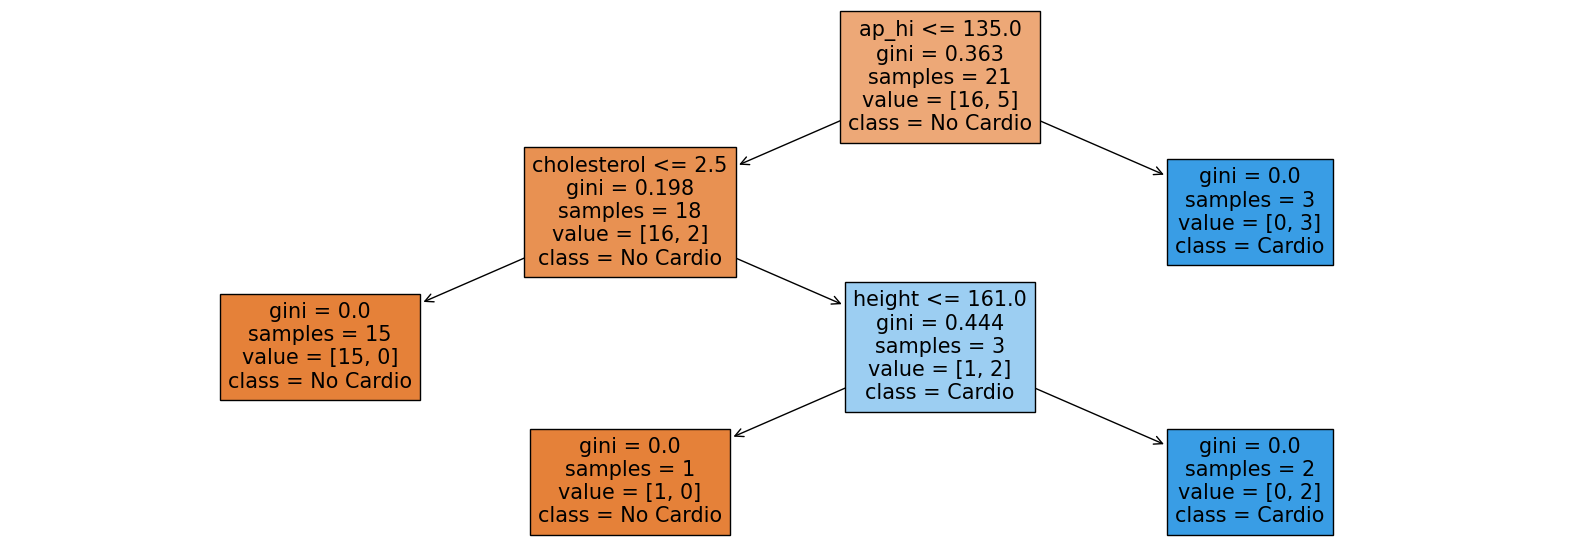


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



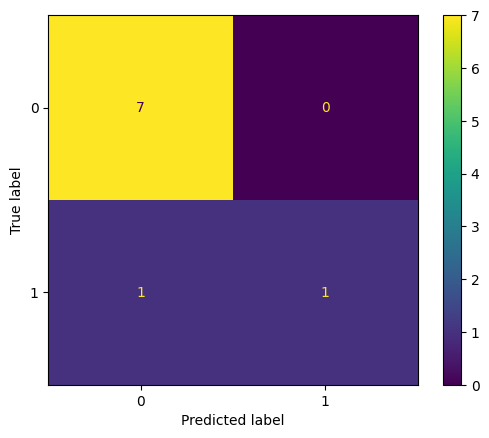

In [6]:
# Зчитування файлу cardio.csv
df = pd.read_csv('/content/drive/My Drive/cardio.csv', delimiter = ';')

# Перші 30 записів
df = df.head(30)

# Матриця ознак X та вектор міток y
X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = df['cardio']
print
print("")

# Дані на навчання і тестування
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Побудова моделі класифікатора
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# Візуалізація побудованого дерева рішень
plt.figure(figsize = (20, 7))
plot_tree(tree, feature_names = X.columns, filled = True, class_names = ['No Cardio', 'Cardio'])
plt.show()

# Результати класифікації для тестового набору
model_pred = tree.predict(X_test)

# Результати класифікації
print("")
print("Classification Report:")
print(classification_report(y_test, model_pred))

# Візуалізація матриці помилок
cm = confusion_matrix(y_test, model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree.classes_).plot()
plt.show()